# Dewali sales analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("diwali_sales_data.csv")

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(columns=['unnamed1'], inplace=True)
df.drop(columns=['Status'], inplace=True)


In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df['Amount'].fillna(df['Amount'].mean())


0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11251, dtype: float64

In [12]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# 1️⃣ Find Top 5 Best-Selling Product Categories

In [14]:
top_categories = df.groupby('Product_Category')['Orders'].sum().reset_index()
top_categories = top_categories.sort_values(by="Orders", ascending = False)
top_5_categories=top_categories.head(5)

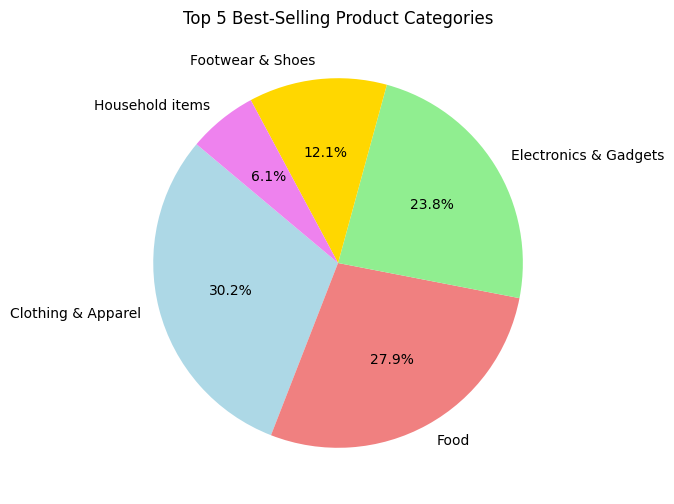

In [16]:
# Plot a pie chart for the top 5 best-selling product categories
plt.figure(figsize=(6, 6))
plt.pie(top_5_categories['Orders'], labels=top_5_categories['Product_Category'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen', 'gold', 'violet'], 
        startangle=140)

plt.title("Top 5 Best-Selling Product Categories")
plt.show()


# 🔹 Conclusion:


--->1. The top 5 product categories with the highest number of orders will be displayed.
    
 --->2. These categories represent the most popular products among customers.
    
 Businesses should focus on stocking more of these items, offering discounts, and creating marketing campaigns to drive more sales.

# 2️⃣ Identify High Revenue-Generating States

In [17]:
# Ensure 'Amount' is numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Group by State and calculate total revenue
highest_revenue = df.groupby('State')['Amount'].sum().reset_index()

# Sort by highest revenue in descending order
highest_revenue = highest_revenue.sort_values('Amount', ascending=False)

# Display the top 5 states with highest revenue
highest_revenue.head()


,State,Amount
14,Uttar Pradesh,1.939388e+07
10,Maharashtra,1.443700e+07
7,Karnataka,1.353299e+07
2,Delhi,1.163218e+07
9,Madhya Pradesh,8.120049e+06


In [18]:
import humanize

highest_revenue['Amount'] = highest_revenue['Amount'].apply(lambda x: humanize.intword(x))
top_5_highest_revenue = highest_revenue.head(5)
top_5_highest_revenue = top_5_highest_revenue.sort_values('Amount', ascending=True)

In [19]:
top_5_highest_revenue.head(5)

,State,Amount
2,Delhi,11.6 million
7,Karnataka,13.5 million
10,Maharashtra,14.4 million
14,Uttar Pradesh,19.4 million
9,Madhya Pradesh,8.1 million


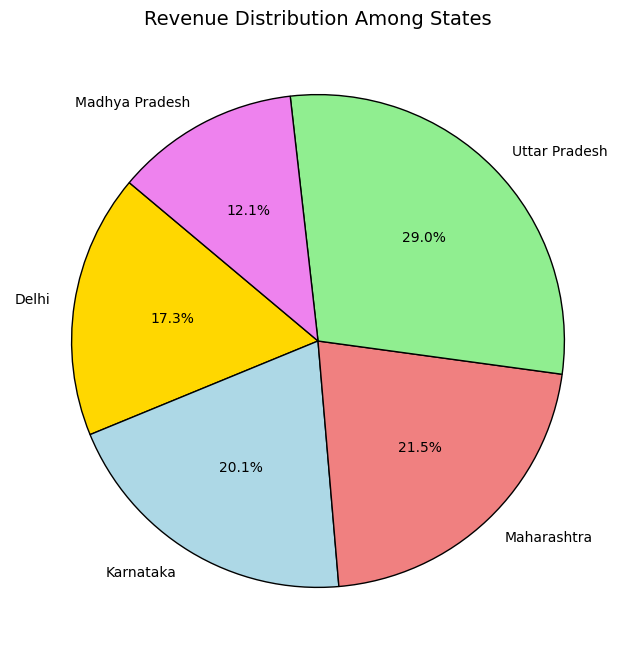

In [20]:
# Convert revenue to numeric (remove "million" and multiply by 1,000,000)
top_5_highest_revenue['Amount'] = top_5_highest_revenue['Amount'].str.replace(' million', '', regex=False).astype(float) * 1_000_000



# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_highest_revenue['Amount'], labels=top_5_highest_revenue['State'], autopct='%1.1f%%', startangle=140, 
        colors=['gold', 'lightblue', 'lightcoral', 'lightgreen', 'violet'], wedgeprops={'edgecolor': 'black'})

# Adding title
plt.title("Revenue Distribution Among States", fontsize=14)

# Show the chart
plt.show()

# 📌 Conclusion 


1️⃣ Uttar Pradesh (29.0%) contributes the highest sales, indicating it is the most profitable state for the business.

2️⃣ Maharashtra (21.5%) is the second-largest contributor, suggesting strong customer engagement.

3️⃣ Karnataka (20.1%) also has significant sales, making it another key market.

4️⃣ Delhi (17.3%) shows a moderate share, highlighting potential for growth.
                                                              
5️⃣ Madhya Pradesh (12.1%) has the lowest contribution, suggesting a need for improved marketing strategies in this region.

📝 Business Insights:
                  
✔ Increase marketing efforts in Delhi & Madhya Pradesh to boost sales.
                  
✔ Expand inventory & offers in Uttar Pradesh & Maharashtra to maximize revenue.
                  
✔ Analyze customer preferences in Karnataka to maintain and improve sales.

# 3️⃣ Find Customer Demographics Spending the Most



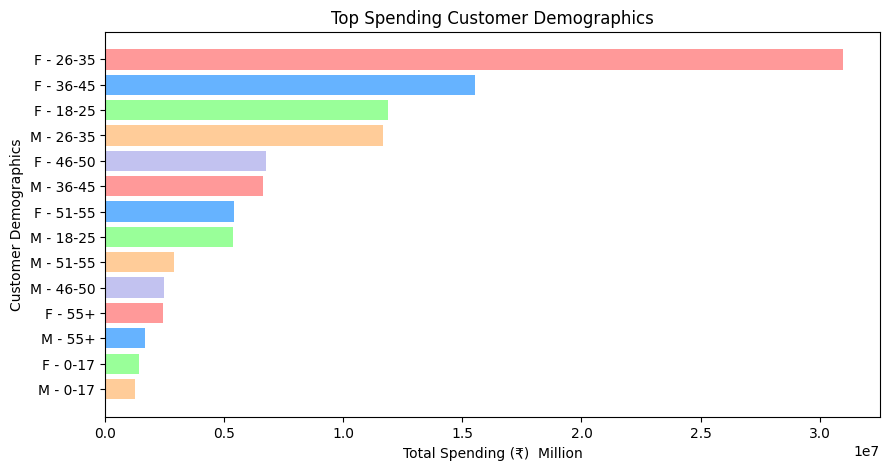

In [52]:

# Group by Gender and Age Group, then sum the Amount
spending_by_demographics = df.groupby(["Gender", "Age Group"])["Amount"].sum().reset_index()

# Sort by total spending in descending order
spending_by_demographics = spending_by_demographics.sort_values(by="Amount", ascending=False)

spending_by_demographics.head()

# Plot a bar chart
plt.figure(figsize=(10, 5))
plt.barh(spending_by_demographics["Gender"] + " - " + spending_by_demographics["Age Group"], 
         spending_by_demographics["Amount"], color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

plt.xlabel("Total Spending (₹)  Million")
plt.ylabel("Customer Demographics")
plt.title("Top Spending Customer Demographics")
plt.gca().invert_yaxis()  # To display highest spender at the top
plt.show()


In [53]:
import humanize

spending_by_demographics['Amount'] = spending_by_demographics['Amount'].apply(lambda x: humanize.intword(x))

spending_by_demographics = spending_by_demographics.sort_values('Amount', ascending=False)
spending_by_demographics.head(10)

,Gender,Age Group,Amount
4,F,46-50,6.8 million
10,M,36-45,6.6 million
5,F,51-55,5.4 million
8,M,18-25,5.4 million
2,F,26-35,31.0 million
12,M,51-55,2.9 million
11,M,46-50,2.5 million
6,F,55+,2.4 million
3,F,36-45,15.5 million
1,F,18-25,11.9 million


# 📌 Conclusion


1️⃣ Females aged 26-35 spend the most, making them the most valuable customer segment.

2️⃣ Females in the 36-45 and 18-25 age groups also contribute significantly to total spending.

3️⃣ Males aged 26-35 are the top male spenders but contribute less than the leading female groups.

4️⃣ Older demographics (46+ years) have lower spending, indicating lower engagement or purchasing power.

5️⃣ Teenagers (0-17 years) have the least spending, likely due to financial dependence.

📝 Business Insights:

✔ Target marketing campaigns towards females aged 26-35, as they are the biggest spenders.

✔ Offer premium and exclusive deals for females aged 18-45 to maintain and boost sales.

✔ Develop strategies to increase engagement among male shoppers, particularly those aged 36-45.

✔ Explore products and promotions tailored for older demographics to increase their spending potential.

In [47]:
spending_by_demographics.head()

,Gender,Age Group,Amount
2,F,26-35,3.098286e+07
3,F,36-45,1.553832e+07
1,F,18-25,1.188700e+07
9,M,26-35,1.164949e+07
4,F,46-50,6.771754e+06


# 4️⃣ Most Profitable Occupations

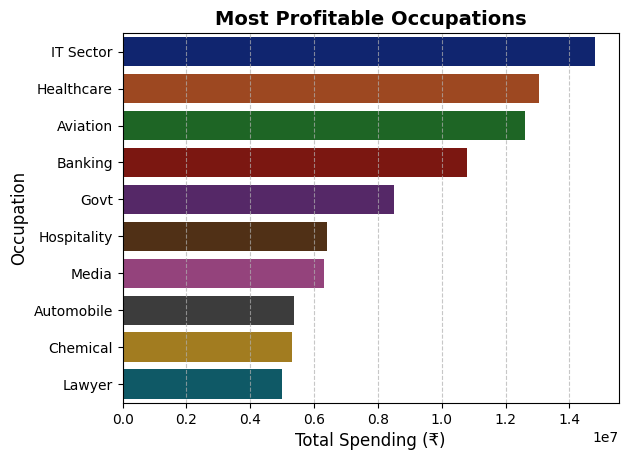

In [27]:
profitale_occupation = df.groupby('Occupation')['Amount'].sum().reset_index()
profitale_occupation = profitale_occupation.sort_values(by = 'Amount', ascending = False)
most_profitale_occupation=profitale_occupation.head(10)



sns.barplot(x= 'Amount',y = 'Occupation',data = most_profitale_occupation, hue="Occupation", palette="dark", legend=False)


# Customizing the chart
plt.title("Most Profitable Occupations", fontsize=14, fontweight="bold")
plt.xlabel("Total Spending (₹)", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add a grid for better readability

# Show the chart
plt.show()

# 📌 Conclusion from the "Most Profitable Occupations" Chart

1. IT Sector is the Highest Contributor – Customers from the IT sector have the highest total spending, making it the most profitable occupation.
    
2. Healthcare & Aviation Follow Closely – These sectors also contribute significantly to overall revenue, indicating strong purchasing power.
    
3. Banking & Government Professionals Spend More – This suggests that financial and government professionals are valuable target customers.
    
4. Lawyers & Chemical Industry Have Lower Spending – These occupations contribute the least, indicating either lower purchasing power or less
engagement in the market.

4. Marketing Strategy Implications – Businesses should focus on IT, Healthcare, and Aviation professionals by offering premium 
products, targeted discounts, and personalized promotions to maximize sales.

# 5️⃣ Gender-Wise Purchasing Behavior

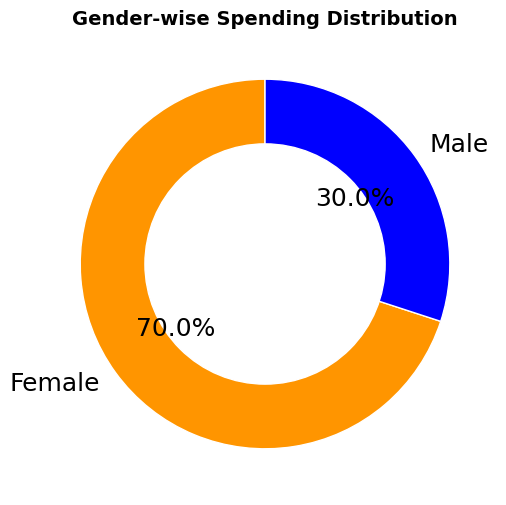

In [58]:
gender_wise = df.groupby('Gender')['Amount'].sum().reset_index()
gender_wise['Gender'] = gender_wise['Gender'].replace({'M': 'Male', 'F': 'Female'})

# Define colors
colors = ["#ff9500", "blue"]  # Custom colors for Male and Female

# Create Pie Chart (Donut Chart)
plt.figure(figsize=(6, 6))
plt.pie(gender_wise['Amount'], labels=gender_wise['Gender'], autopct='%1.1f%%', colors=colors, 
        wedgeprops={'edgecolor': 'white'}, startangle=90,
         textprops={'fontsize': 18, 'color': 'black'}  
       )
plt.gca().add_artist(plt.Circle((0, 0), 0.65, color='white'))  # Creating the hole in the center

# Title
plt.title("Gender-wise Spending Distribution", fontsize=14, fontweight='bold')

# Show Chart
plt.show()

# 📌 Conclusion:

From the Gender-wise Spending Distribution donut chart:

a) Females contribute 70% of the total spending, indicating that they are the primary consumers in this dataset.

b) Males contribute 30%, showing significantly lower spending compared to females.
    
🔹 Insights & Business Recommendations:

1. Target Female Consumers: Since females are the major spenders, businesses should focus on marketing strategies, promotions, and
   personalized offers to attract and retain female customers.

2. Increase Male Engagement: Introduce male-focused products, discounts, and advertising campaigns to boost male customer spending.
    
3. Optimize Product Categories: Analyzing the specific product categories that females prefer can help in inventory management and sales optimization.

4. This insight can help businesses align their strategies to maximize revenue and customer satisfaction. 🚀📈

# 6️  Most Profitable Product Categories

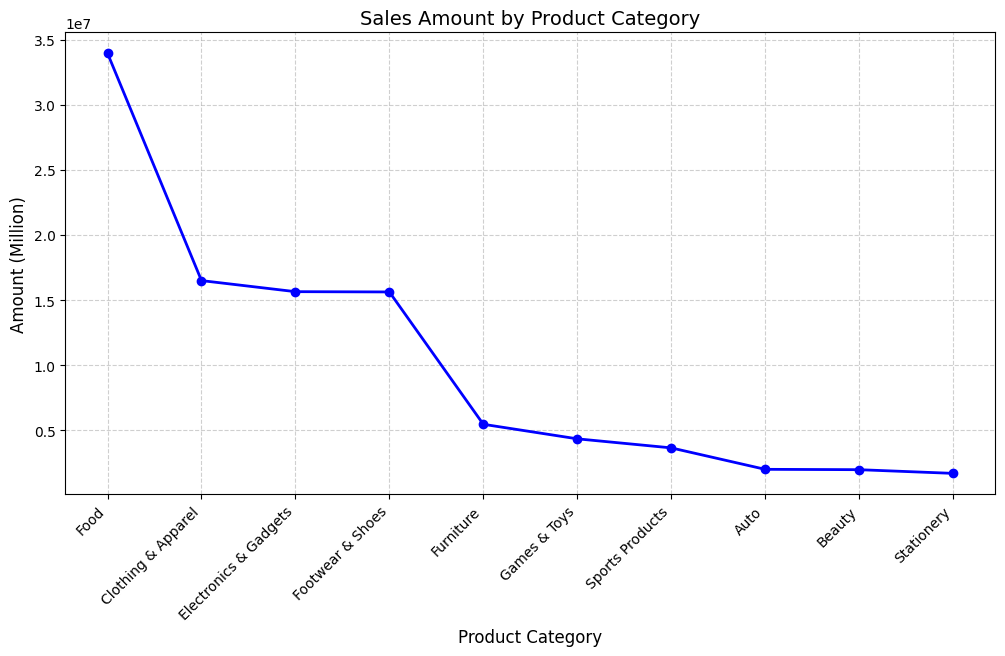

In [65]:
prof_product_cate = df.groupby('Product_Category')['Amount'].sum().reset_index()
prof_product_cate = prof_product_cate.sort_values(by = 'Amount', ascending = False)
most_prof_product_cate=prof_product_cate.head(10)


# Create line chart
plt.figure(figsize=(12, 6))
plt.plot(most_prof_product_cate["Product_Category"], most_prof_product_cate["Amount"], marker="o", linestyle="-", color="b", linewidth=2)

# Formatting
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Amount (Million)", fontsize=12)
plt.title("Sales Amount by Product Category", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.6)

# Show chart
plt.show()

# Conclusion


1. Food has the highest sales amount, significantly leading other product categories.

2. Clothing & Apparel, Electronics & Gadgets, and Footwear & Shoes follow closely with similar sales figures, indicating strong demand in these sectors.

3. Furniture and Games & Toys show a moderate level of sales, lower than the top categories but still contributing substantially.
    
4. Sports Products, Auto, Beauty, and Stationery have the lowest sales, suggesting either lower demand or market penetration challenges.

5. The overall trend shows a sharp decline from Food to Furniture, then a gradual decrease towards Stationery.

6. This suggests that businesses focusing on Food and Apparel may see higher returns, while lower-selling categories might need better
marketing or product positioning.

# 7️ Customer Spending Behavior (High-Value Customers)

In [68]:
high_value_customer=df.groupby('Cust_name')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)



high_value_customer['Amount'] = high_value_customer['Amount'].apply(lambda x: humanize.intword(x))



,Cust_name,Amount
1196,Vishakha,382.8 thousand
1102,Sudevi,287.1 thousand
1185,Vasudev,281.0 thousand
800,Neola,275.2 thousand
28,Alejandro,272.5 thousand
2,Aastha,267.0 thousand
1049,Shreyshi,265.6 thousand
491,Hazel,242.3 thousand
24,Akshat,241.3 thousand
446,Gopal,239.1 thousand


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6348\1958256593.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(high_value_customer["Cust_name"], rotation=45, ha="right")  # Rotate x-axis labels for better readability


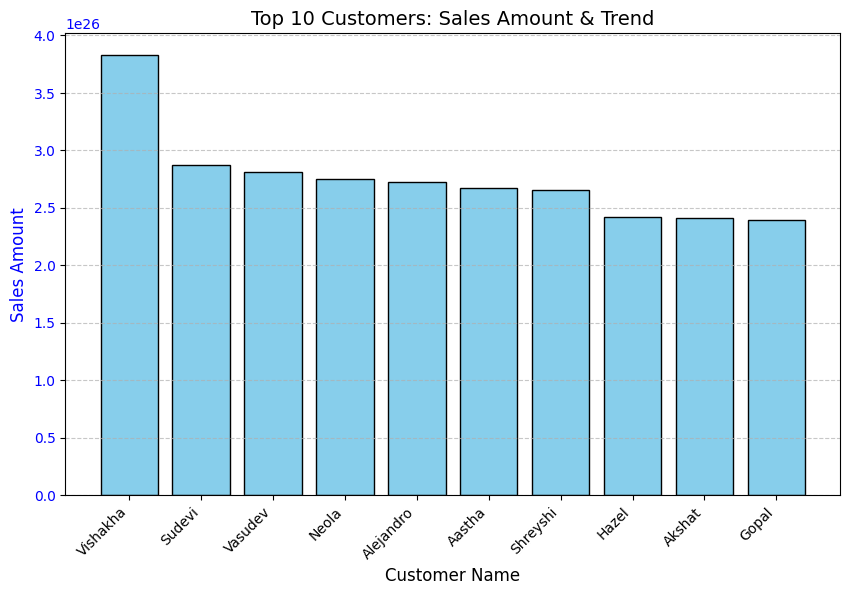

In [76]:

 # Remove non-numeric characters (e.g., 'thousand') and convert to float
high_value_customer['Amount'] = high_value_customer['Amount'].replace({' thousand': ''}, regex=True).astype(float) * 1000


# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart (left y-axis)
ax1.bar(high_value_customer["Cust_name"], high_value_customer["Amount"], color="skyblue", edgecolor="black", label="Sales Amount")
ax1.set_xlabel("Customer Name", fontsize=12)
ax1.set_ylabel("Sales Amount", fontsize=12, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")


# Formatting
plt.title("Top 10 Customers: Sales Amount & Trend", fontsize=14)
ax1.set_xticklabels(high_value_customer["Cust_name"], rotation=45, ha="right")  # Rotate x-axis labels for better readability
ax1.grid(axis="y", linestyle="--", alpha=0.7)


# Show chart
plt.show()

# 📌 Conclusion for the Chart: "Top 10 Customers: Sales Amount & Trend"


1. Vishakha is the Highest Contributor – She has the highest sales amount, significantly more than other customers.

2. Consistent Sales Among Other Customers – The remaining top customers (Sudevi, Vasudev, Neola, Alejandro, etc.) have similar sales
figures, with minor variations.
    
3. Sales Drop After Top 3 Customers – A noticeable decline in sales is observed after Vishakha, with Sudevi and Vasudev having the next highest amounts.

4. Balanced Distribution – Except for Vishakha, most customers have comparable sales values, indicating a more evenly spread revenue contribution.
    
5. Need for Customer Retention – Businesses may focus on retaining high-value customers like Vishakha while boosting engagement for those
with lower sales.

# 8️⃣ Customer Retention & Repeat Orders


In [78]:
orders=df.groupby('Cust_name').agg({'Product_ID': 'nunique', 'Orders': 'count'}).query("Orders > 1").sort_values(by='Orders', ascending=False)


In [80]:
orders.head(10)

,Product_ID,Orders
Cust_name,,
Vishakha,39,42
Shreyshi,31,32
Sudevi,30,30
Akshat,28,29
Alejandro,26,28
Aastha,27,27
Hazel,25,25
Stuti,24,25
Halladay,25,25


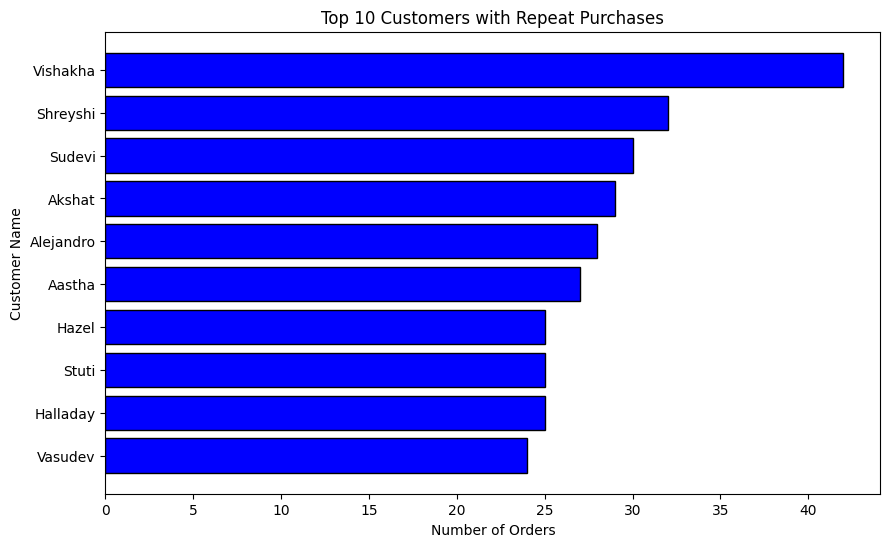

In [83]:


# Select the top 10 customers for better visualization
top_customers = orders.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_customers.index, top_customers['Orders'], color='blue', edgecolor='black')
plt.xlabel("Number of Orders")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers with Repeat Purchases")
plt.gca().invert_yaxis()  # Invert y-axis to show highest orders at the top
plt.show()


# Conclusion: Top 10 Customers with Repeat Purchases

1️⃣ Vishakha is the most loyal customer, making the highest number of repeat purchases.

2️⃣ Shreyshi and Sudevi follow closely, indicating strong engagement with the business.

3️⃣ The top 5 customers contribute significantly to overall sales, suggesting they should be prioritized for loyalty programs.
                                                                                                      
4️⃣ Businesses can offer personalized discounts, exclusive offers, or early access to new products for these customers to retain their engagement.
                                                                                                
5️⃣ Understanding the buying patterns of these top customers can help in targeted marketing strategies and customized recommendations.
                                                                                                